In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("white")
sns.set_context("notebook", font_scale=1.3)
%matplotlib inline

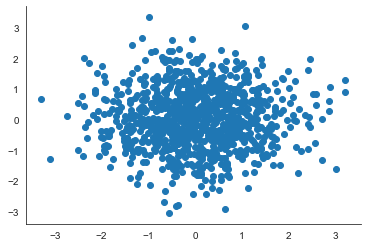

In [2]:
n = 1000
xs = np.random.normal(size=(n, 2))
plt.scatter(*xs.T)
sns.despine()

In [3]:
def h(x, t):
    """ Pollard's weird loss function """
    return np.minimum((x - t)**2, 1)

def H(xs, t):
    """ Sample average of Pollar's weird loss function """
    return np.mean(h(xs, t))

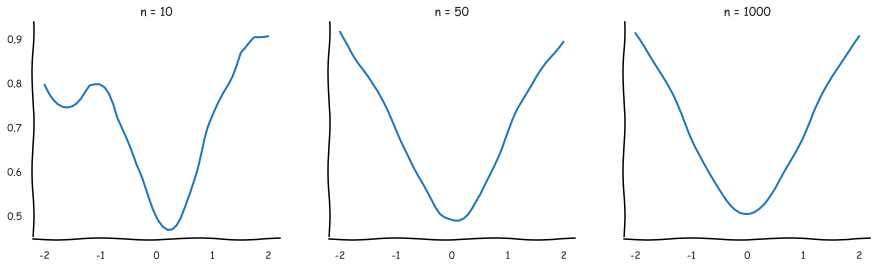

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
thetas =  np.linspace(-2, 2)
for k, m in enumerate([10, 50, 1000]):
    ax[k].set_title(f"n = {m}")
    ax[k].plot(thetas, [H(xs[:m], t) for t in thetas])
sns.despine()
fig.savefig("H.svg")

In [ ]:
plt.plot([0,1,2])

In [ ]:
ns = np.arange(10, 1001, 20)
n_mc = 2000
EmaxZ = np.empty_like(ns, dtype=float)
for k, n in enumerate(ns):
    Z = np.random.normal(size=(n_mc, n))
    maxZ = np.max(Z, 1)
    EmaxZ[k] = np.mean(maxZ)

In [ ]:
plt.plot(ns, EmaxZ)

In [ ]:
eps = 0.1
xgrid = np.linspace(0, 5, 1000)
y1 = np.sin(xgrid)
plt.plot(xgrid, y1)
plt.grid()

In [ ]:
# epsgrid = np.linspace(0, 5, 1/eps)
# ycur = 0
# for ei in epsgrid:
#     ynext = 

## Brownian motion example

In [ ]:
style_list = ['default', 'classic'] + sorted(style for style in plt.style.available if style != 'classic')

In [ ]:
delta = 2
dt = 0.001
n = int(np.ceil(delta / dt))
ts = np.linspace(0, delta, n)
b = np.cumsum(np.random.normal(scale=dt, size=n))

for style_label in style_list:
        with plt.style.context(style_label):
            #fig = plot_figure(style_label=style_label)

            fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
            ax[0].plot(ts, b)
            ax[0].axhline(0, linestyle="--", color="black")
            ax[0].set_title("$B(t)$")

            ax[1].plot(ts, np.abs(b))
            ax[1].axhline(0, linestyle="--", color="black")
            ax[1].set_title("$|B(t)|$")

            sns.despine()

## Sup of absolute brownian motion

In [87]:
def func_to_graph(x):
    delta = 2
    n = 1000
    ts = np.linspace(0, delta, n)
    dt = np.sqrt(ts[1] - ts[0])
    b = np.cumsum(np.random.normal(scale=dt, size=n))
    return lambda x: np.interp(x, ts, b)

In [89]:
func_to_graph(2)

<function __main__.func_to_graph.<locals>.<lambda>(x)>

In [3]:
def brownian(n=1000, n_mc=10000, delta=2):
    delta = 2
    ts = np.linspace(0, delta, n)
    dt = np.sqrt(ts[1] - ts[0])
    b = np.cumsum(np.random.normal(scale=dt, size=(n_mc, n)), axis=1)
    return ts, b

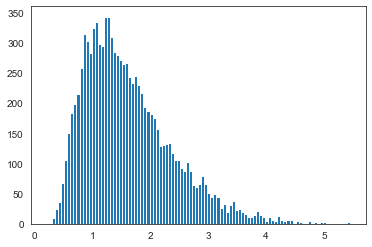

In [4]:
ts, b = brownian(n = 10)
bmax = np.max(np.abs(b), axis=1)
plt.hist(bmax, bins=100);

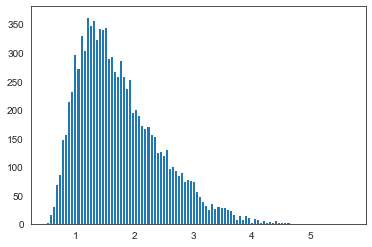

In [5]:
ts, b = brownian(n = 1000)
bmax = np.max(np.abs(b), axis=1)
plt.hist(bmax, bins=100);

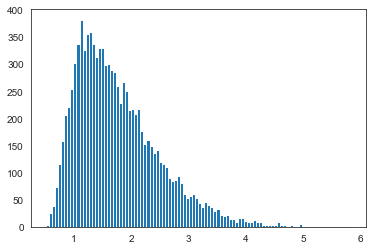

In [6]:
ts, b = brownian(n = 10000)
bmax = np.max(np.abs(b), axis=1)
plt.hist(bmax, bins=100);

In [24]:
dfs = []
for k in range(1, 7):
    T = np.linspace(0, n, 2**k, endpoint=False).astype(int)
    maxbt = np.max(np.abs(b[:,T]), axis=1)
    dfs.append(pd.DataFrame({"maxbt": maxbt, "k": k, "t": ts}))
dfs = pd.concat(dfs)

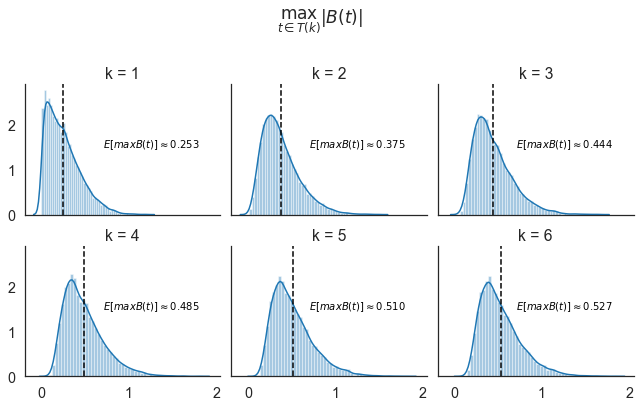

In [66]:
g = sns.FacetGrid(col="k",
                  col_wrap=3,
                  data=dfs)
g.map(sns.distplot, "maxbt")
g.map(lambda x, color: plt.axvline(x.mean(), color="black", linestyle="--"), "maxbt")
g.map(lambda x, color: plt.text(.7, 1.5, "$E[max B(t)] \\approx {:0.3f}$".format(x.mean()), color="black", fontsize=10), "maxbt")
g.set(xlabel="")
g.fig.suptitle("$\\max_{t \in T(k)} |B(t)|$", fontsize=17);
g.fig.subplots_adjust(top=0.8)